### Подключаем нужные библиотеки

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, model_selection

### Формируем датасет

In [2]:
digits = datasets.load_digits()
print(digits.data.shape)
print(digits.target.shape)

(1797, 64)
(1797,)


<Figure size 432x288 with 0 Axes>

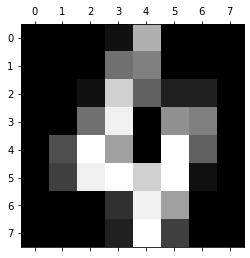

In [11]:
plt.gray()
plt.matshow(digits.images[4])
plt.show()

In [15]:
X = digits.data
y = digits.target

### Модель из одного дерева

In [14]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score

In [21]:
score_1 = cross_val_score(DecisionTreeClassifier(), X, y, cv=10).mean()
score_1

0.8269087523277466

### Бэггинг

In [24]:
from sklearn.ensemble import BaggingClassifier

In [25]:
score_2 = cross_val_score(BaggingClassifier(n_estimators=100), X, y, cv=10).mean()
score_2

0.9276194909993792

### Ограничение количества признаков

In [29]:
score_3 = cross_val_score(BaggingClassifier(n_estimators=100,
                                           bootstrap_features=True,
                                           max_features=int(X.shape[1] ** (1/2))), 
                          X, y, cv=10).mean()
score_3

0.9298851644941031

### Ограничение количества признаков на каждом дереве

In [31]:
score_4 = cross_val_score(BaggingClassifier(base_estimator=DecisionTreeClassifier(max_features=int(X.shape[1] ** (1/2))),
                                           n_estimators=100), 
                          X, y, cv=10).mean()
score_4

0.9499068901303538

### Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
score_5 = cross_val_score(RandomForestClassifier(), X, y, cv=10).mean()
score_5

0.9499162011173183

### Зависимость качества классификации от различных параметров

In [34]:
from sklearn.model_selection import validation_curve

In [50]:
def accuracy_from_param(param_name, param_range):
    train_scores, test_scores = validation_curve(RandomForestClassifier(), X, y, 
                                            param_name=param_name, param_range=param_range, 
                                             cv=10,  scoring='accuracy', n_jobs=-1)
    plt.grid(True)
    plt.plot(param_range, train_scores.mean(axis=1), 'g-', marker='o', label='train')
    plt.plot(param_range, test_scores.mean(axis=1), 'r-', marker='o', label='test')
    plt.ylim((0.5, 1.05))
    plt.legend(loc='lower right')

#### Зависимость от числа деревьев:

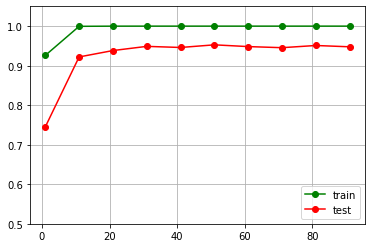

In [51]:
accuracy_from_param('n_estimators', np.arange(1, 101, 10))

#### Зависимость от количества признаков, выбираемых при построении каждой вершины дерева:

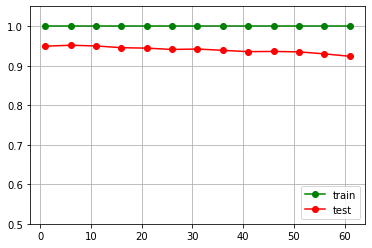

In [52]:
accuracy_from_param('max_features', np.arange(1, X.shape[1], 5))

#### Зависимость от ограничений на глубину дерева:

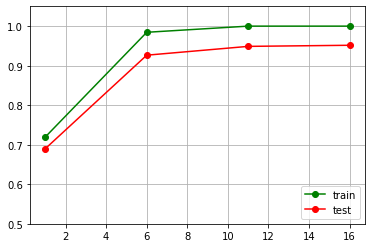

In [53]:
accuracy_from_param('max_depth', np.arange(1, 21, 5))

### Выводы:
При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев. С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется.

При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.

При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга).